Si prega di compilare il modulo (le tue informazioni)
**Please fill in the form (your information)

In [1]:
#Codice: Esame2-G2-A


#Nome:

#Cognome:

#Matricola:



**Domanda1**: Considera il dataset "Wine" di Sklearn e classifica i tipi di vino utilizzando un classificatore Random Forest. Esegui 10 validazioni incrociate e stampa i risultati della precisione media. Usa l'80% dei dati per l'addestramento. Prevedi le etichette sul set di test, calcola e visualizza (tramite grafico) la matrice di confusione. Calcola l'importanza delle caratteristiche dal modello Random Forest. Visualizza (tramite grafico) solo le 5 caratteristiche più importanti (le prime 5 più importanti, non tutte). (10 punti)
==============================================================================================================
**Question1:** Consider the "Wine" dataset from Sklearn and classify wine types using a Random Forest classifier. Perform 10 cross-validations and print the mean accuracy results. Use 80% of the data for training. Predict the labels on the test set, compute, and plot the confusion matrix. Calculate the feature importance from the Random Forest model. Visualize (plot) only the top 5 important features (top 5 important not all).  (10 points)

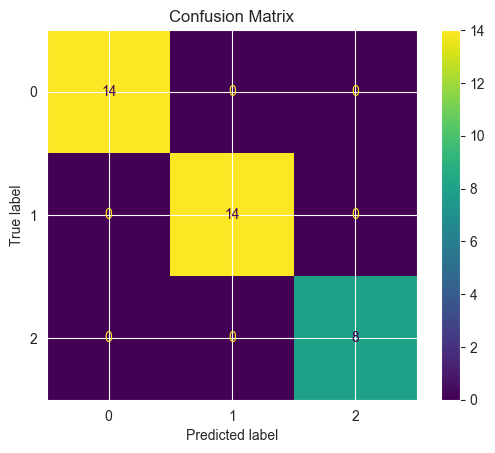

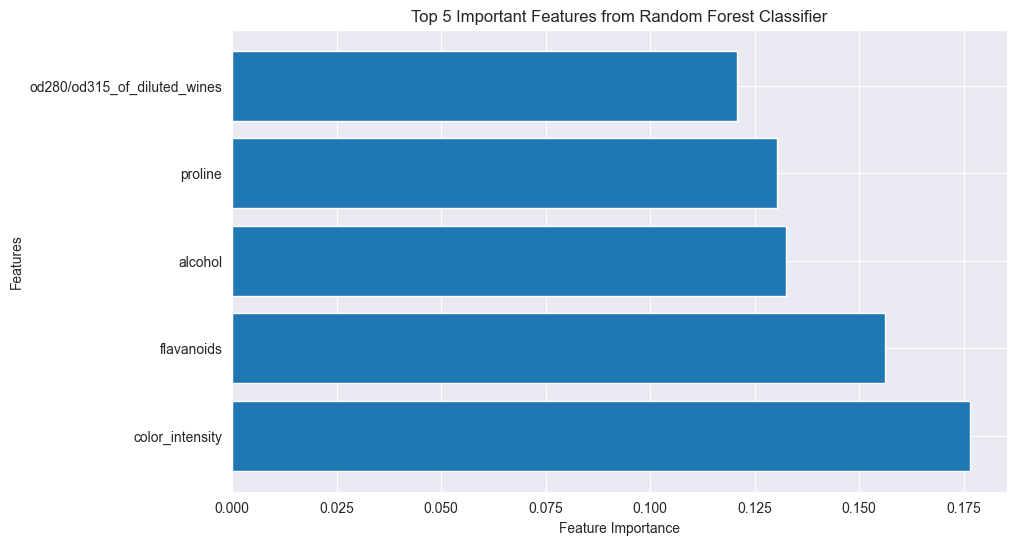

np.float64(0.9714285714285715)

In [16]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42) #oppure random_state=42
# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=10)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = rf_classifier.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Get the feature importance from the random forest model
feature_importances = rf_classifier.feature_importances_

# Find the indices of the top 5 most important features
top_5_indices = np.argsort(feature_importances)[::-1][:5]

# Get the feature names and their importance values
top_5_features = [(wine.feature_names[i], feature_importances[i]) for i in top_5_indices]

# Plot the top 5 important features
plt.figure(figsize=(10, 6))
plt.barh([wine.feature_names[i] for i in top_5_indices], [feature_importances[i] for i in top_5_indices], align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 5 Important Features from Random Forest Classifier')
plt.show()

# Print the mean accuracy from cross-validation
mean_accuracy = np.mean(cv_scores)
mean_accuracy


**Domanda2**: Considera il dataset "Breast Cancer" di Sklearn. Converti il dataset in un DataFrame di pandas e visualizza le prime 5 righe del DataFrame per ispezionare il dataset. Esegui il clustering K-Means con K=3, utilizzando le prime due caratteristiche del dataset. Traccia i punti dati raggruppati e calcola e traccia i centri dei cluster. (10 punti)
==============================================================================================================
**Question2:** Consider the 'Breast Cancer' dataset from Sklearn. Convert it into a pandas DataFrame and display the first 5 rows of the DataFrame to inspect the dataset. Perform K-Means clustering with K=3, using the first two features of the dataset. Plot the clustered data points and calculate and plot the cluster centers. (10 points)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

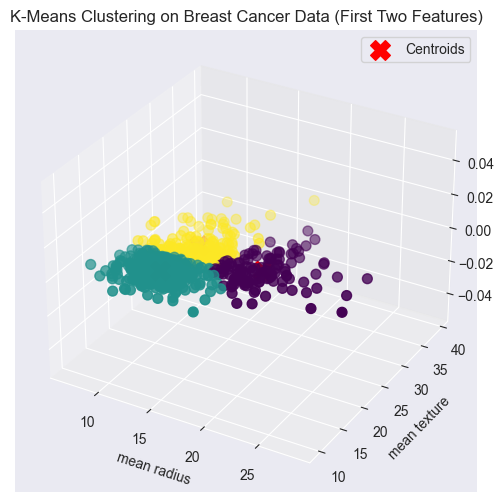

In [6]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Convert to pandas DataFrame
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Display the first 5 rows of the DataFrame to inspect the dataset
print(df.head())

# Select the first two features for clustering
X = df.iloc[:, :2].values

# Perform K-Means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Predict the cluster labels
y_kmeans = kmeans.predict(X)

# Plot the clustered data points
plt.figure(figsize=(8, 6))
plt.axes(projection='3d')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title('K-Means Clustering on Breast Cancer Data (First Two Features)')
plt.legend()
plt.show()


**Domanda3**: Considera il dataset "Iris" di Sklearn. Trova il numero ottimale di cluster (K) utilizzando l'algoritmo di clustering K-Means. Imposta i valori di K da 1 a 10, calcola la somma dei quadrati all'interno del cluster (inertia) e il punteggio silhouette per ogni K, traccia i valori di inertia e i punteggi silhouette rispetto al numero di cluster (K), e identifica il punto di gomito e il K ottimale basato sul punteggio silhouette e inertia. (10 punti)
============================================================================================================
**Question3:** Consider the 'Iris' dataset from Sklearn. Use the K-Means clustering algorithm to find the optimal number of clusters (K). Set K values ranging from 1 to 10, compute the cluster sum of squares (inertia) and the silhouette score for each K. Plot the inertia values and silhouette scores against the number of clusters (K), and identify the elbow point and the optimal K based on both the silhouette score and the inertia. (10 points)

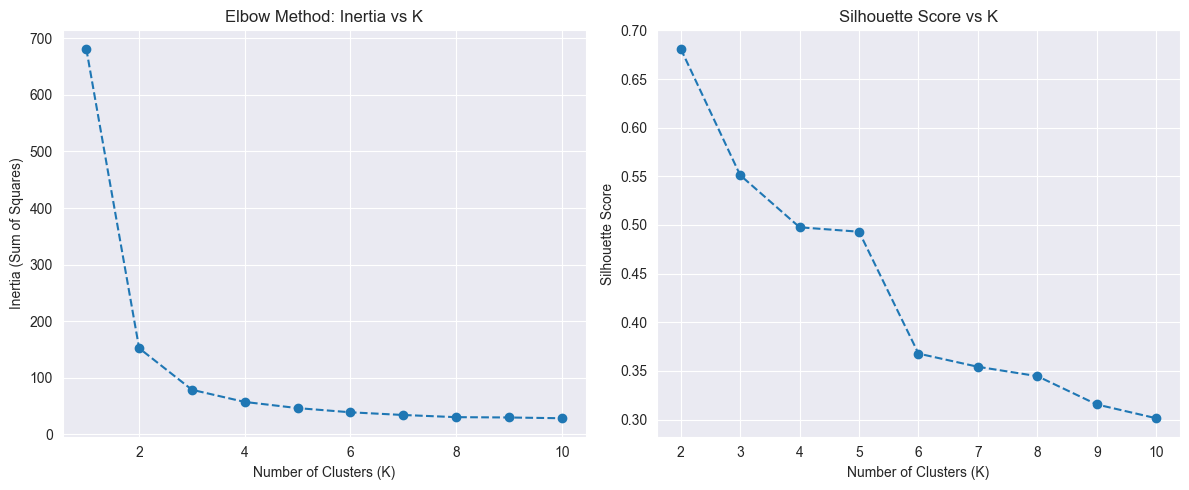

Elbow point (Optimal K based on inertia): 9
Optimal K based on silhouette score: 2


In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Range of K values to test
K_range = range(1, 11)

# Lists to store inertia and silhouette scores
inertia_values = []
silhouette_scores = []

# Compute inertia and silhouette scores for each K
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X)
    
    # Append inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)
    
    # Silhouette score can only be calculated when K > 1
    if K > 1:
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X, labels))
    else:
        silhouette_scores.append(float('nan'))  # Not defined for K=1

# Plot Inertia values against K
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squares)')
plt.title('Elbow Method: Inertia vs K')

# Plot Silhouette scores against K
plt.subplot(1, 2, 2)
plt.plot(K_range[1:], silhouette_scores[1:], 'b--',  marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')

plt.tight_layout()
plt.show()

# Identify the elbow point (where inertia starts to decrease slowly)
elbow_point = np.argmin(np.diff(np.diff(inertia_values))) + 2  # Adding 2 because of second derivative approach
print(f"Elbow point (Optimal K based on inertia): {elbow_point}")

# Identify the optimal K based on the highest silhouette score
optimal_K_silhouette = np.argmax(silhouette_scores[1:]) + 2  # Offset by 2 because silhouette_scores[1:] starts from K=2
print(f"Optimal K based on silhouette score: {optimal_K_silhouette}")
